# Tunisian Vaccine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/Tunisia.csv')
data.head(5)

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,Tunisia,2021-03-12,Sputnik V,https://www.africanews.com/2021/03/13/tunisia-...,0,0,0.0,NaN
1,Tunisia,2021-03-13,Sputnik V,https://www.facebook.com/santetunisie.rns.tn/v...,743,743,0.0,NaN
2,Tunisia,2021-03-14,Sputnik V,https://www.facebook.com/santetunisie.rns.tn/p...,2076,2076,0.0,NaN
3,Tunisia,2021-03-15,Sputnik V,https://www.facebook.com/186480324724413/posts...,2555,2555,0.0,NaN
4,Tunisia,2021-03-19,Sputnik V,https://www.facebook.com/186480324724413/posts...,6861,6861,0.0,NaN


In [3]:
data= data.drop(['vaccine','source_url','location','total_boosters'], axis=1) 
data.head(5)

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,2021-03-12,0,0,0.0
1,2021-03-13,743,743,0.0
2,2021-03-14,2076,2076,0.0
3,2021-03-15,2555,2555,0.0
4,2021-03-19,6861,6861,0.0


In [4]:
data.isnull().sum()

date                       0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    3
dtype: int64

In [5]:
data['people_fully_vaccinated'] = data['people_fully_vaccinated'].fillna(0)
data[data.isnull().any(axis=1)]

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated


In [6]:
data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated
count,2.310000e+02,2.310000e+02,2.310000e+02
mean,4.633212e+06,2.905772e+06,2.056462e+06
std,3.999629e+06,2.364698e+06,2.019199e+06
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.426280e+05,5.693150e+05,2.566925e+05
50%,2.934709e+06,1.807279e+06,8.254100e+05
75%,8.690304e+06,5.406058e+06,4.197440e+06
max,1.122558e+07,6.386392e+06,5.451952e+06


In [7]:
data.corr()

,total_vaccinations,people_vaccinated,people_fully_vaccinated
total_vaccinations,1.000000,0.995593,0.992558
people_vaccinated,0.995593,1.000000,0.981059
people_fully_vaccinated,0.992558,0.981059,1.000000


In [8]:
data.shape

(231, 4)

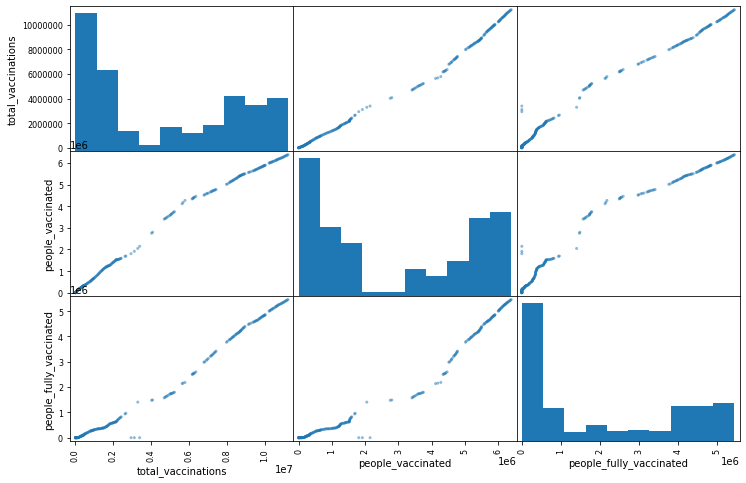

In [9]:
from pandas.plotting import scatter_matrix
ls = ["date","total_vaccinations", "people_vaccinated","people_fully_vaccinated"]
scatter_matrix(data[ls], figsize=(12, 8));

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     231 non-null    object 
 1   total_vaccinations       231 non-null    int64  
 2   people_vaccinated        231 non-null    int64  
 3   people_fully_vaccinated  231 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 7.3+ KB


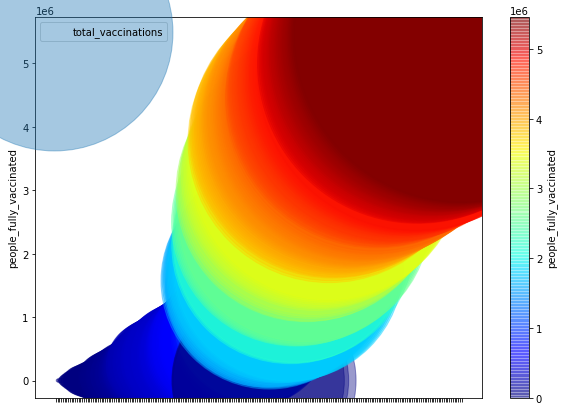

In [11]:
data.plot(kind="scatter", x="date", y="people_fully_vaccinated", alpha=0.4,
 s=data["total_vaccinations"]/100, label="total_vaccinations", figsize=(10,7),
 c="people_fully_vaccinated", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [12]:
#Total des personnes qui sont fini leur vaccination jusqu'a aujourd'hui
data.people_fully_vaccinated.max()

5451952.0

# Parti Machine Learning

In [13]:
data['date'] = pd.to_numeric(data.date.str.replace('-',''))
data.head()

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,20210312,0,0,0.0
1,20210313,743,743,0.0
2,20210314,2076,2076,0.0
3,20210315,2555,2555,0.0
4,20210319,6861,6861,0.0


In [14]:
x=data[['date','total_vaccinations']].values
y=data[['people_vaccinated']].values

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()  
model.fit(x,y)

LinearRegression()

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model2 = LinearRegression() 
model2.fit(x_train,y_train)

LinearRegression()

In [17]:
prediction2=model2.predict(x_train)

In [18]:
score=(model2.score(x_test,y_test))*100
score

99.15669230724865

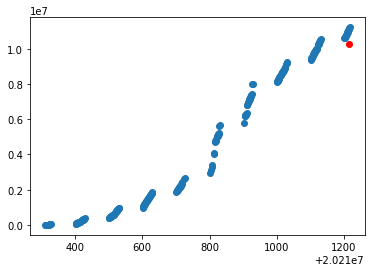

In [19]:
plt.scatter(x[:,0],x[:,1])
plt.scatter(20211214,10292254,c='red')

In [20]:
#Faire la prédiction de notre saisir randoms
pred=model.predict([['20211214','10292254']])
print('La Résultat est:',int(pred))

La Résultat est: 6285030


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


# Parti Interface

In [21]:
# importation des bibliothèques des tools QTWidgets
from PyQt5 import QtWidgets, uic
import sys
import webbrowser

In [22]:
# -----------------------functions Front-------------------------
def exit():
    Fen.destroy()
    Fen2.destroy()
def transfert():
    Fen2.show() 
    Fen.destroy()
# -----------------------functions Back-------------------------    
def lien():
     webbrowser.open_new('http://localhost:8888/notebooks/Desktop/WORK2/Code.ipynb')  
def trait():
    d=Fen2.lineEdit.text()
    i=Fen2.lineEdit_2.text()
    rt=model.predict([[d,i]])
    Fen2.lineEdit_3.setText(str(int(rt)))
    rt2=11935764-rt
    Fen2.lineEdit_4.setText(str(int(rt2))) 

In [ ]:
App =QtWidgets.QApplication(sys.argv)
#  ---------------Front-----------------
Fen=uic.loadUi('Front.ui')
Fen.show()
Fen.pushButton.clicked.connect(transfert)
Fen.pushButton_2.clicked.connect(exit)
# -------------Back--------------
Fen2=uic.loadUi('Back.ui')
Fen2.pushButton.clicked.connect(trait)
Fen2.pushButton_2.clicked.connect(lien)
Fen2.pushButton_3.clicked.connect(exit)
# -----------Exécutér----------
App.exec_()
sys.exit()